In [4]:
pip install cirq

  Using cached cirq-0.14.1-py3-none-any.whl (7.8 kB)
  Using cached cirq_aqt-0.14.1-py3-none-any.whl (19 kB)
  Using cached cirq_core-0.14.1-py3-none-any.whl (1.8 MB)
  Using cached cirq_google-0.14.1-py3-none-any.whl (541 kB)
  Using cached cirq_rigetti-0.14.1-py3-none-any.whl (56 kB)
  Using cached cirq_ionq-0.14.1-py3-none-any.whl (48 kB)
  Using cached cirq_web-0.14.1-py3-none-any.whl (593 kB)
  Using cached cirq_pasqal-0.14.1-py3-none-any.whl (30 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
     |████████████████████████████████| 7.3 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 15.6 MB/s eta 0:00:01
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
     |████████████████████████████████| 55.6 MB 353 kB/s  eta 0:00:01
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached networkx-2.8.2-py3-none-any.whl (2.0 MB)
  Using cached sympy-1.9-py3-

  Attempting uninstall: certifi
    Found existing installation: certifi 2022.5.18.1
    Uninstalling certifi-2022.5.18.1:
      Successfully uninstalled certifi-2022.5.18.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
import cirq_google

# print the supremacy chip
#print(cirq_google.Sycamore)

In [3]:
# These are three qubits on a line
qubits = cirq.LineQubit.range(3)
a = qubits[0]
b = qubits[1]
c = qubits[2]

# This is a collection of operations
# Each operation is a gate
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b, c), cirq.H(b)]
circuit = cirq.Circuit(ops)

# print circuit diagram
print(circuit)

0: ───H───────────

1: ───H───@───H───
          │
2: ───────X───────


In [4]:
def Bell(n):
    q_chain = cirq.LineQubit.range(2)
    bell = cirq.Circuit()

    bell.append(cirq.H(q_chain[0]))
    bell.append(cirq.CNOT(q_chain[0],q_chain[1]))
    
    if n == 1:
        return bell
    elif n==2:
        bell.append(cirq.Z(q_chain[1]))
        return bell
    elif n==3:
        bell.append(cirq.X(q_chain[1]))
        return bell
    elif n==4:
        bell.append(cirq.X(q_chain[1]))
        bell.append(cirq.Z(q_chain[0]))
        return bell

bell = Bell(4)
print(bell) #1:

simulator = cirq.Simulator()
result = simulator.simulate(bell)
print('Bra-ket notation for the wavefunction:')
print(result.dirac_notation())

0: ───H───@───Z───
          │
1: ───────X───X───
Bra-ket notation for the wavefunction:
0.71|01⟩ - 0.71|10⟩


In [5]:
# we must initialize the Alice and Bob states in the bell state

import random
from math import pi 

random.seed(42)

# ORDER:
# Message
# Alice
# Bob

# creating basics of circuit
qubits = 3
q_chain = cirq.LineQubit.range(qubits)
tele = cirq.Circuit()
message = q_chain[0]
alice = q_chain[1]
bob = q_chain[2]

# initializing the 3 qubits
#tele.append(cirq.testing.random_superposition(dim=2**qubits)

t = pi*random.uniform(0, 1)

gate = cirq.ry(t)

tele.append(gate(message))

#print(tele.append(gate(message))

tele.append(cirq.H(alice))
tele.append(cirq.CNOT(alice,bob))

# NEXT: we want to undo the bell state created between the two qubits of alice

tele.append(cirq.CNOT(message,alice))
tele.append(cirq.H(message))

tele.append(cirq.measure(message,alice))

tele.append(cirq.CNOT(message,bob))
tele.append(cirq.CZ(alice,bob))
            
print(tele)

#message_random = cirq.testing.random_superposition(dim=2**qubits)
            
simulator = cirq.Simulator()
result = simulator.simulate(tele)
print('Bra-ket notation for the wavefunction:')
print(result.dirac_notation())

0: ───Ry(0.639π)───────@───H───M───@───────
                       │       │   │
1: ───H────────────@───X───────M───┼───@───
                   │               │   │
2: ────────────────X───────────────X───@───
Bra-ket notation for the wavefunction:
0.54|000⟩ + 0.84|001⟩


In [6]:
random.seed(42)

q_chain = cirq.LineQubit.range(1)
message_test = cirq.Circuit()

t = pi*random.uniform(0, 1)

gate = cirq.ry(t)

message_test.append(gate(message))

print(message_test)
simulator = cirq.Simulator()
result = simulator.simulate(message_test)
print('Bra-ket notation for the wavefunction:')
print(result.dirac_notation())


0: ───Ry(0.639π)───
Bra-ket notation for the wavefunction:
0.54|0⟩ + 0.84|1⟩


# Exercise 6:

In [7]:
from numpy import cos, sin
from math import sqrt
import matplotlib.pyplot as plt 

def Population(w,wo,w1,t):
    Omega = sqrt(w1**2 + (w-wo)**2)
    population = (w1*sin(Omega*t/2)/Omega)**2
    return population


def U(w,wo,w1,t):
    q_chain = cirq.LineQubit.range(1)
    troter = cirq.Circuit()

    dt = 0.05
    N = int(t/dt)
    
    thetaz = -wo*dt
    thetax = 2*w1*dt
    
    for n in range(N):
        rx = cirq.rx(thetax*cos(w*n*dt))
        rz = cirq.rz(thetaz)
        troter.append(rz(q_chain[0]))
        troter.append(rx(q_chain[0]))        
    return troter


def Troterization(w,wo,w1,t, mode='simulate', noise=''):
    
    reps = 1000
    troter = U(w,wo,w1,t)
    simulator = cirq.Simulator()
    
    if mode == 'run':
        troter.append(cirq.measure(q_chain[0]))
        result = simulator.run(troter, repetitions=reps)
        counts = result.histogram(key = '0') 
        # population for state |1> := prob(measurement=1)
        population = counts[1]/reps
        return population
    elif mode == 'simulate':
        result = simulator.simulate(troter)
        #print('Bra-ket notation for the wavefunction:')
        #print(result.dirac_notation())
        #print('Population of state |1>')
        population = abs(result.final_state_vector[-1])**2
        #print(np.around(population, 3))
        return population
        
    elif mode == 'noise':
        troter.append(cirq.measure(q_chain[0]))
        result = cirq.sample(program=troter, noise=noise, repetitions=reps) # type(result) = <class 'cirq.study.result.ResultDict'>
        # type(histogram) = <class 'collections.Counter'>
        counts = result.histogram(key = '0') 
        # population for state |1> := prob(measurement=1)
        population = counts[1]/reps
        return population
    
    else:
        raise Exception('Not a valid mode: {}'.format(mode))

In [8]:
ts = np.linspace(0.2,4,100)
pop_a = []
theo_a = []
for t in ts:
    w, wo, w1 = 25.5, 25, 2
    theo_a.append(Population(w,wo,w1,t))
    pop_a.append(Troterization(w,wo,w1,t,'run'))
    
ws = np.arange(10,40,0.2)
pop_b = []
theo_b = []
for w in ws:
    wo, w1 = 25, 2
    t = pi/w1
    theo_b.append(Population(w,wo,w1,t))
    pop_b.append(Troterization(w,wo,w1,t,'run'))

pop_c = []
theo_c = []
for t in ts:
    w = 2
    theo_c.append(Population(w,w,w,t))
    pop_c.append(Troterization(w,w,w,t,'run'))

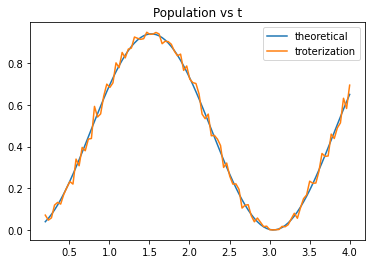

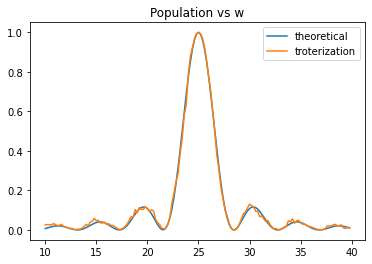

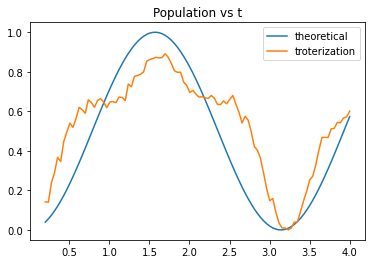

In [9]:
plt.figure()
plt.title('Population vs t')
plt.plot(ts, theo_a, label='theoretical')
plt.plot(ts, pop_a, label='troterization')
plt.legend()
plt.show()

plt.figure()
plt.title('Population vs w')
plt.plot(ws, theo_b, label='theoretical')
plt.plot(ws, pop_b, label='troterization')
plt.legend()
plt.show()

plt.figure()
plt.title('Population vs t')
plt.plot(ts, theo_c, label='theoretical')
plt.plot(ts, pop_c, label='troterization')
plt.legend()
plt.show()

# Exercise 7

In [10]:
pop_noise = []
noise = cirq.ConstantQubitNoiseModel(cirq.GeneralizedAmplitudeDampingChannel(p=0.5,gamma=0.02))

ts_new = np.linspace(0.2,10,100)

for t in ts_new:
    w, wo, w1 = 25.5, 25, 2
    pop_noise.append(Troterization(w,wo,w1,t,'noise',noise))

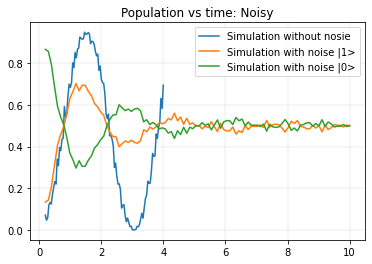

In [11]:
plt.figure()
plt.title('Population vs time: Noisy')
plt.plot(ts, pop_a, label='Simulation without nosie')
plt.plot(ts_new, pop_noise, label='Simulation with noise |1>')
plt.plot(ts_new, 1-np.array(pop_noise), label='Simulation with noise |0>')
plt.legend()
plt.grid(linestyle='-', linewidth=0.2)
plt.show()

In [12]:
ps = [0,0.5,0.9,1]
gammas = [0,0.02,0.1]

populations = np.zeros((len(ps),len(ts),len(gammas)))

w, wo, w1 = 25.5, 25, 2

for i, p in enumerate(ps):
    for j, gamma in enumerate(gammas):
        for k, t in enumerate(ts):
            noise = cirq.ConstantQubitNoiseModel(cirq.GeneralizedAmplitudeDampingChannel(p=p,gamma=gamma))
            populations[i,k,j] = (Troterization(w,wo,w1,t,'noise',noise))

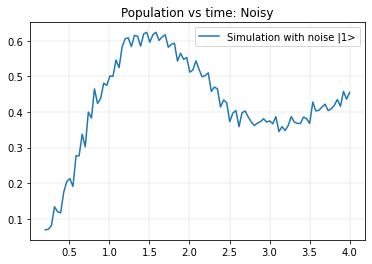

In [13]:
plt.figure()
plt.title('Population vs time: Noisy')
plt.plot(ts, populations[2,:,1], label='Simulation with noise |1>')
plt.legend()
plt.grid(linestyle='-', linewidth=0.2)
plt.show()

***Notes***:

For $p = 1$ the channel reduces to the normal amplitude damping channel \
For $p = 0$ the channel behaves like an amplitude enhancing channel, driving the system to the $|1><1|$ state

# Exercise 9:

Idea: to get the state we can diagonalize the matrix, and obtain the first (and only) eigen state, that would be our initial pure state

In [32]:
#circuit for state tomography
circuit9 = cirq.Circuit()

qchain = cirq.LineQubit.range(1)
q0 = qchain[0]
T = cirq.Z**0.25

ops = [cirq.H(q0), T(q0)]

circuit9 = cirq.Circuit(ops)

# print circuit diagram
print(circuit9)

simulator = cirq.Simulator()
result = simulator.simulate(circuit9)
print('Bra-ket notation for the wavefunction:')
print(result.dirac_notation())


0: ───H───T───
Bra-ket notation for the wavefunction:
0.71|0⟩ + (0.5+0.5j)|1⟩


In [61]:
x = cirq.SimulatesExpectationValues()
ops = [cirq.H(q0), T(q0)]
print(x.simulate_expectation_values_sweep_iter(program=circuit9,observables=ops))

TypeError: _simulate_expectation_values_sweep_to_iter() missing 1 required positional argument: 'params'

In [40]:
from numpy import linalg as LA

In [49]:
sampler = cirq.DensityMatrixSimulator()
result = cirq.experiments.state_tomography(sampler=sampler, qubits=qchain, circuit= circuit9)

ro =  result._density_matrix

print(ro)

w, v = LA.eig(ro)

print(abs(w[0])**2)
v[:,0]

[[0.531-4.53246652e-17j 0.368-3.54000000e-01j]
 [0.368+3.54000000e-01j 0.469+1.11022302e-16j]]
1.0232681998867788


array([0.72821635+0.j        , 0.49391783+0.47512748j])

# Exercise 10

In [239]:
"""Define a custom gate with a parameter."""
class RXZ(cirq.Gate):
    def __init__(self, b):
        super(RXZ, self)
        self.b = b

    def _num_qubits_(self):
        return 2

    def _unitary_(self):
        return np.array([
            [np.cos(self.b), 0.0, 1j*np.sin(self.b),  0.0],
            [0.0,  np.cos(self.b), 0.0,  -1j*np.sin(self.b)],
            [1j*np.sin(self.b),  0.0, np.cos(self.b),  0.0],
            [0.0,  -1j*np.sin(self.b), 0.0, np.cos(self.b)]
        ])

    def _circuit_diagram_info_(self, args):
        return f"RXZ({self.b})",  f"RXZ({self.b})"
    
class RZX(cirq.Gate):
    def __init__(self, b):
        super(RZX, self)
        self.b = b

    def _num_qubits_(self):
        return 2

    def _unitary_(self):
        return np.array([
            [np.cos(self.b), 1j*np.sin(self.b), 0.0,  0.0],
            [1j*np.sin(self.b), np.cos(self.b), 0.0,  0.0],
            [0.0, 0.0, np.cos(self.b), -1j*np.sin(self.b)],
            [0.0, 0.0, -1j*np.sin(self.b), np.cos(self.b)]
        ])

    def _circuit_diagram_info_(self, args):
        return f"RZX({self.b})",  f"RZX({self.b})"
    
def expXZ(b):
    " exp(ib(XZ)) acting on two qubits"
    q_chain = cirq.LineQubit.range(2)
    rotation = cirq.Circuit()
    rotation.append(RXZ(b=b).on(*q_chain))
    return rotation

def expZX(b):
    " exp(ib(ZX)) acting on two qubits"
    q_chain = cirq.LineQubit.range(2)
    rotation = cirq.Circuit()
    rotation.append(RZX(b=b).on(*q_chain))
    return rotation


def ansatz(a,b):
    q_chain = cirq.LineQubit.range(2)
    circ = cirq.Circuit()

    rz = cirq.rz(-2*a)

    circ.append(expZX(b))
    circ.append(expXZ(b))

    circ.append(rz(q_chain[1]))
    circ.append(rz(q_chain[0]))

    return circ

ansatz_state = ansatz(0,0)
print(ansatz_state)

result = simulator.simulate(ansatz_state)
print('Bra-ket notation for the wavefunction:')
print(result.dirac_notation())

0: ───RZX(0)───RXZ(0)───Rz(0)───
      │        │
1: ───RZX(0)───RXZ(0)───Rz(0)───
Bra-ket notation for the wavefunction:
|00⟩


In [240]:
# Exercise 12

alist = np.linspace(0,np.pi,20)
blist = np.linspace(0,np.pi,20)

energies = np.empty(shape=(len(alist),len(blist)))

q_chain = cirq.LineQubit.range(2)
q0 = q_chain[0]
q1 = q_chain[1]


for i, a in enumerate(alist):
    for j, b in enumerate(blist):
        energies[i,j] = simulator.simulate_expectation_values(ansatz(a,b), observables=-cirq.Z(q0)*cirq.X(q1)-cirq.X(q0)*cirq.Z(q1) )[0].real

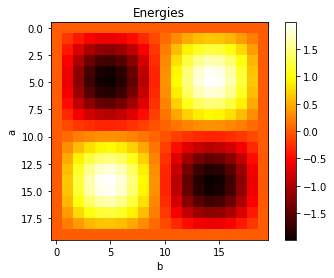

In [241]:
import matplotlib.pyplot as plt

pos = plt.imshow(energies, cmap='hot', interpolation='nearest')

plt.title('Energies')
plt.ylabel('a')
plt.xlabel('b')
plt.colorbar(pos)

plt.show()

In [247]:
print("The smallest energy is: ", np.amin(energies))
arg = np.argmin(energies)
print(arg)
b= arg%20
a= (arg-b)//20
print("Indices for the arrays are: (i: {} and j: {}) ".format(a,b) )
print("Values for the indices are: (a: {} and b: {}) ".format(alist[a],blist[b]) )

The smallest energy is:  -1.986361026763916
105
Indices for the arrays are: (i: 5 and j: 5) 
Values for the indices are: (a: 0.8267349088394192 and b: 0.8267349088394192) 


In [250]:
print(np.where(energies == energies.min()))

(array([ 5, 14]), array([ 5, 14]))


In [251]:


test =simulator.simulate_expectation_values(ansatz(alist[14],alist[14]), observables=-cirq.Z(q0)*cirq.X(q1)-cirq.X(q0)*cirq.Z(q1) )[0].real
test

-1.986361026763916

In [255]:
#13
gs = ansatz(alist[a],blist[b])
print(gs)

result = simulator.simulate(gs)
print('Bra-ket notation for the wavefunction:')
print(result.dirac_notation())

#correct up to a global phase of e^(ipi/2)

0: ───RZX(0.8267349088394192)───RXZ(0.8267349088394192)───Rz(-0.526π)───
      │                         │
1: ───RZX(0.8267349088394192)───RXZ(0.8267349088394192)───Rz(-0.526π)───
Bra-ket notation for the wavefunction:
(-0.04+0.46j)|00⟩ + 0.5j|01⟩ + 0.5j|10⟩ + (-0.04-0.54j)|11⟩


# Not used:

In [ ]:
def Troterization_noise(w,wo,w1,t):
    
    noise = cirq.ConstantQubitNoiseModel(cirq.GeneralizedAmplitudeDampingChannel(p=0.9,gamma=0.02))
    
    troter = U(w,wo,w1,t)
    
    reps = 10000
    
    troter.append(cirq.measure(q_chain[0]))
    result = cirq.sample(program=troter, noise=noise, repetitions=reps) # type(result) = <class 'cirq.study.result.ResultDict'>
    
    # other keys don't seem to work
    # type(histogram) = <class 'collections.Counter'>
    histogram = result.histogram(key = '0') 
    
    # _ = cirq.plot_state_histogram(histogram, plt.subplot())
    # plt.show()

    # population for state |1> := prob(measurement=1)
    population = histogram[1]/reps
    